# <center> <h1> BDAT 1004 – Data Programming

# Question 1


### Step 1. Import the necessary libraries

In [8]:
import pandas as pd 

### Steps 2 and 3 Import the dataset and assign it to a variable called users

In [16]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')   
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4. Mean age per occupation

In [17]:
users.groupby('occupation').age.mean().round(2)

occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [38]:
users1 = users.groupby(['occupation','gender']).count()
users_pivot = pd.pivot_table(users1,'user_id','occupation','gender')
users_pivot['male_ratio'] = (users_pivot['M']/(users_pivot['M']+users_pivot['F']))
users_sorted = users_pivot.sort_values(by = 'male_ratio', ascending = False)
users_sorted

gender,F,M,male_ratio
occupation,,,
engineer,2.0,65.0,0.970149
technician,1.0,26.0,0.962963
retired,1.0,13.0,0.928571
programmer,6.0,60.0,0.909091
executive,3.0,29.0,0.906250
scientist,3.0,28.0,0.903226
entertainment,2.0,16.0,0.888889
lawyer,2.0,10.0,0.833333
salesman,3.0,9.0,0.750000


### Step 6. For each occupation, calculate the minimum and maximum ages

In [39]:
users.groupby('occupation').age.agg(('min','max')) 

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7. For each combination of occupation and sex, calculate the mean age


In [40]:
users.groupby(['occupation', 'gender']).age.mean().round(2)

occupation     gender
administrator  F         40.64
               M         37.16
artist         F         30.31
               M         32.33
doctor         M         43.57
educator       F         39.12
               M         43.10
engineer       F         29.50
               M         36.60
entertainment  F         31.00
               M         29.00
executive      F         44.00
               M         38.17
healthcare     F         39.82
               M         45.40
homemaker      F         34.17
               M         23.00
lawyer         F         39.50
               M         36.20
librarian      F         40.00
               M         40.00
marketing      F         37.20
               M         37.88
none           F         36.50
               M         18.60
other          F         35.47
               M         34.03
programmer     F         32.17
               M         33.22
retired        F         70.00
               M         62.54
salesman       F 

### Step 8. For each occupation present the percentage of women and men

In [41]:
users.groupby(['occupation']).gender.value_counts(normalize=True).mul(100).round(2)

occupation     gender
administrator  M          54.43
               F          45.57
artist         M          53.57
               F          46.43
doctor         M         100.00
educator       M          72.63
               F          27.37
engineer       M          97.01
               F           2.99
entertainment  M          88.89
               F          11.11
executive      M          90.62
               F           9.38
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         M          83.33
               F          16.67
librarian      F          56.86
               M          43.14
marketing      M          61.54
               F          38.46
none           M          55.56
               F          44.44
other          M          65.71
               F          34.29
programmer     M          90.91
               F           9.09
retired        M          92.86
               F  

# Question 2
## *Euro Teams*

### Step 1, 2, 3. Import the libraries and dataset and assign it to a variable called euro12

In [43]:
import pandas as pd

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4. Select only the Goal column

In [44]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [51]:
euro12['Team'].count()

16

### Step 6. What is the number of columns in the dataset?

In [52]:
euro12.shape[1]

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [53]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [54]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [56]:
discipline['Yellow Cards'].mean()

7.4375

### Step 10. Filter teams that scored more than 6 goals

In [50]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [222]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [57]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 13. Select all columns except the last 3

In [226]:
euro12.head(-3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step 14. Shooting Accuracy from England, Italy and Russia

In [245]:
euro12_index = euro12.set_index('Team')
euro12_index['Shooting Accuracy'].loc[['England','Italy','Russia']]

Team
England    50.0%
Italy      43.0%
Russia     22.5%
Name: Shooting Accuracy, dtype: object

# Question 3
## *Housing*

### Step 1. Import the necessary libraries

In [58]:
import numpy as np
import random
import pandas as pd

### Step 2. Create 3 different Series, each of length 100, as follows:

In [59]:
#• The first a random number from 1 to 4
s1 = [(random.randint(1, 4)) for i in range(100)]
first = pd.Series(s1, name='first')
# The second a random number from 1 to 3
s2 = [(random.randint(1, 3)) for i in range(100)]
second = pd.Series(s2, name='second')
# The third a random number from 10,000 to 30,000
s3 = [(random.randint(10000, 30000)) for i in range(100)]
third = pd.Series(s3, name='third')

### Step 3. Create a DataFrame by joinning the Series by colum

In [62]:
series = pd.concat([first, second, third], axis=1)
series.head()

,first,second,third
0,3,1,23661
1,3,1,11560
2,4,2,19352
3,2,3,21874
4,4,2,14381


### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [63]:
series['bigcolumn'] = series[series.columns[0:]].apply(lambda x: ','.join(x.astype(str)), axis=1)

In [64]:
series.head()

,first,second,third,bigcolumn
0,3,1,23661,"3,1,23661"
1,3,1,11560,"3,1,11560"
2,4,2,19352,"4,2,19352"
3,2,3,21874,"2,3,21874"
4,4,2,14381,"4,2,14381"


In [65]:
series.tail()

,first,second,third,bigcolumn
95,1,3,19344,"1,3,19344"
96,2,3,23503,"2,3,23503"
97,3,3,18237,"3,3,18237"
98,4,1,23434,"4,1,23434"
99,3,1,23299,"3,1,23299"


### Step 6. Ops it seems it is going only until index 99. Is it true?

In [66]:
if (series.bigcolumn.index.max())==99:
    print('This is TRUE!')
else:
    print('False')
    
series.tail(2)

This is TRUE!


,first,second,third,bigcolumn
98,4,1,23434,"4,1,23434"
99,3,1,23299,"3,1,23299"


### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [67]:
series.reindex(index=range(0,299))

,first,second,third,bigcolumn
0,3.0,1.0,23661.0,"3,1,23661"
1,3.0,1.0,11560.0,"3,1,11560"
2,4.0,2.0,19352.0,"4,2,19352"
3,2.0,3.0,21874.0,"2,3,21874"
4,4.0,2.0,14381.0,"4,2,14381"
...,...,...,...,...
294,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN


# Question 4
## *Wind Statistics*
The data have been modified to contain some missing values, identified by NaN.<br>
Using pandas should make this exercise easier, in particular for the bonus question.<br>
You should be able to perform all of these operations without using a for loop or other looping construct.<br>

The data in 'wind.data' has the following format:<br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL <br>
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04<br>
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83<br>
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71<br>
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 <br>locations in Ireland on that day.[ns].<br>
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.<br>
Step 7. Compute how many non-missing values there are in total.<br>



### Step 1. Import the necessary libraries

In [75]:
import pandas as pd
import datetime

### Step 2. Step 3. Import the dataset, assign to variable 'data' and replace first 3 columns by proper datetime index.

In [76]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+', parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [77]:
def date_fix(x):
    if x.year > 1989:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(date_fix)
                                    #code modified from https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year, answered by Himanshu Arora
    
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [78]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64
data_indexes = data.set_index('Yr_Mo_Dy')
data_indexes.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [79]:
data.isnull().sum()

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [80]:
data.notnull().sum()

Yr_Mo_Dy    6574
RPT         6568
VAL         6571
ROS         6572
KIL         6569
SHA         6572
BIR         6574
DUB         6571
CLA         6572
MUL         6571
CLO         6573
BEL         6574
MAL         6570
dtype: int64

### Step 8. mean windspeeds of the windspeeds over all the locations and all the times.

In [81]:
data.mean().mean()

10.227982360836924

In [82]:
loc_stats = data_indexes.groupby('Yr_Mo_Dy').agg(('min','max'), axis=1) 
loc_stats

RPT           VAL           ROS           KIL           SHA  \
              min    max    min    max    min    max    min    max    min   
Yr_Mo_Dy                                                                    
1961-01-01  15.04  15.04  14.96  14.96  13.17  13.17   9.29   9.29    NaN   
1961-01-02  14.71  14.71    NaN    NaN  10.83  10.83   6.50   6.50  12.62   
1961-01-03  18.50  18.50  16.88  16.88  12.33  12.33  10.13  10.13  11.17   
1961-01-04  10.58  10.58   6.63   6.63  11.75  11.75   4.58   4.58   4.54   
1961-01-05  13.33  13.33  13.25  13.25  11.42  11.42   6.17   6.17  10.71   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  17.58  16.96  16.96  17.62  17.62   8.08   8.08  13.21   
1978-12-28  13.21  13.21   5.46   5.46  13.46  13.46   5.00   5.00   8.12   
1978-12-29  14.00  14.00  10.29  10.29  14.42  14.42   8.71   8.71   9.71   
1978-12-30  18.50  18.50  14.04  14.04  21.29  21.29   9.13   9.13  12.75   
1978-12-31  20.33  20.33  17.41  17.41  27.29  27.29   9.59   9.59  12.08   

                   ...    CLA           MUL           CLO           BEL  \
              max  ...    min    max    min    max    min    max    min   
Yr_Mo_Dy           ...                                                    
1961-01-01    NaN  ...  10.25  10.25  10.83  10.83  12.58  12.58  18.50   
1961-01-02  12.62  ...  10.04  10.04   9.79   9.79   9.67   9.67  17.54   
1961-01-03  11.17  ...    NaN    NaN   8.50   8.50   7.67   7.67  12.75   
1961-01-04   4.54  ...   1.79   1.79   5.83   5.83   5.88   5.88   5.46   
1961-01-05  10.71  ...   6.54   6.54  10.92  10.92  10.34  10.34  12.92   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  13.21  ...  15.59  15.59  14.04  14.04  14.00  14.00  17.21   
1978-12-28   8.12  ...  16.25  16.25  15.25  15.25  18.05  18.05  21.79   
1978-12-29   9.71  ...  12.46  12.46  14.50  14.50  16.42  16.42  18.88   
1978-12-30  12.75  ...  12.87  12.87  12.46  12.46  12.12  12.12  14.67   
1978-12-31  12.08  ...  11.63  11.63  11.58  11.58  11.38  11.38  12.08   

                     MAL         
              max    min    max  
Yr_Mo_Dy                         
1961-01-01  18.50  15.04  15.04  
1961-01-02  17.54  13.83  13.83  
1961-01-03  12.75  12.71  12.71  
1961-01-04   5.46  10.88  10.88  
1961-01-05  12.92  11.83  11.83  
...           ...    ...    ...  
1978-12-27  17.21  40.08  40.08  
1978-12-28  21.79  41.46  41.46  
1978-12-29  18.88  29.58  29.58  
1978-12-30  14.67  28.79  28.79  
1978-12-31  12.08  22.08  22.08  

[6574 rows x 24 columns]

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days <br>
A different set of numbers for each location.

In [84]:
mn = pd.Series([data.min()], name='min')

mx = pd.Series([data.max()], name='max')

mean = pd.Series([data.mean()], name='mean')

sd = pd.Series([data.std()], name='s_dev')

loc_stats = pd.DataFrame([mn, mx, mean, sd]).transpose()
loc_stats

,min,max,mean,s_dev
0,Yr_Mo_Dy 1961-01-01 RPT 0.67 ...,Yr_Mo_Dy 1978-12-31 RPT 35.8 ...,RPT 12.362987 VAL 10.644314 ROS 11.66...,RPT 5.618413 VAL 5.267356 ROS 5.00845...


# Question 5


### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address.
### Step 3. Assign it to a variable called chipo.
### Step 4. See the first 10 entries

In [86]:
import pandas as pd

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [87]:
chipo.shape[0]

4622

### Step 6. What is the number of columns in the dataset?

In [88]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [503]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [505]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

In [515]:
chipo['item_name'].value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

### Step 10. For the most-ordered item, how many items were ordered?

In [718]:
chipo['item_name'].value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

### Step 11. What was the most ordered item in the choice_description column?

In [520]:
chipo['choice_description'].value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

### Step 12. How many items were orderd in total?

In [92]:
chipo.quantity.sum()

4972

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [97]:
chipo1 = chipo.copy()
chipo1['item_price'] = chipo1['item_price'][1:]
chipo1.astype({'item_price':'float64'}).dtypes


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [102]:
chipo2 = chipo.copy()
chipo2['item_price'] = chipo2['item_price'].apply(lambda x: float(x))
chipo2.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [103]:
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

### Step 14. How much was the revenue for the period in the dataset?


In [104]:
chipo.item_price.sum()

34500.16

### Step 15. How many orders were made in the period?

In [533]:
chipo['order_id'].value_counts().count()

1834

### Step 16. What is the average revenue amount per order?

In [105]:
chipo.groupby('order_id').item_price.mean().mean()

7.841910975496643

### Step 17. How many different items are sold

In [106]:
chipo['item_name'].value_counts().count()

50

# Question 6
## *Marriages and divorces*

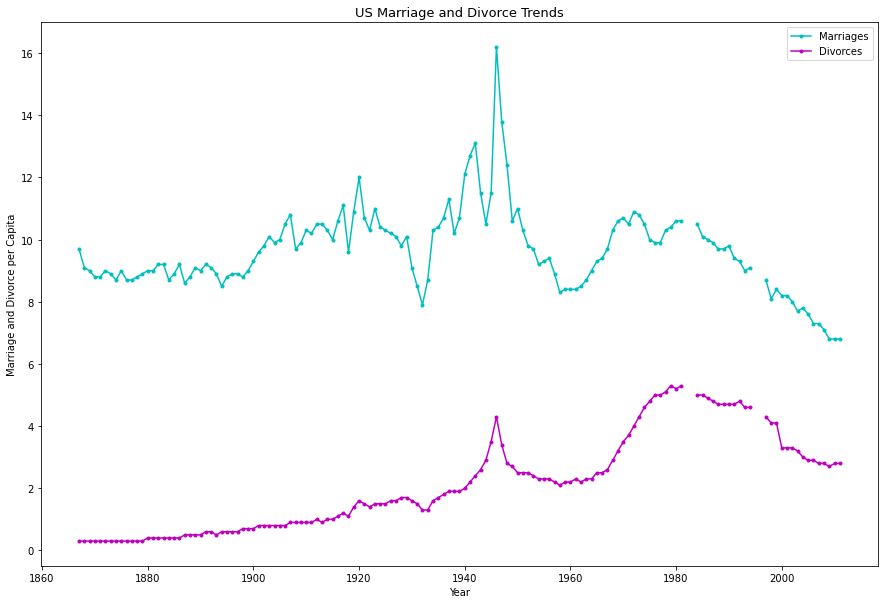

In [729]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
plt.figure(figsize=(15,10))
plt.title('US Marriage and Divorce Trends', fontdict={'fontsize': 13})
plt.plot(marriage.Year, marriage.Marriages_per_1000, 'c.-', label='Marriages')
plt.plot(marriage.Year, marriage.Divorces_per_1000, 'm.-', label='Divorces')
plt.xlabel('Year')
plt.ylabel('Marriage and Divorce per Capita')
plt.legend()
plt.show()

# Question 7

''

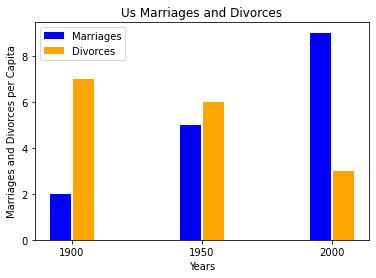

In [590]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

plt.figure()

plt.bar(years - 4.5,
        category1_values,
        color='blue',
        width=8,
        align='center',
        label='Marriages')

plt.bar(years + 4.55,
        category2_values,
        color='orange',
        width=8,
        align='center',
        label='Divorces')

plt.xticks(years, [str(year) for year in years])

plt.xlabel('Years')
plt.ylabel('Marriages and Divorces per Capita')
plt.title('Us Marriages and Divorces')

plt.legend();

# Question 8

Text(0.5, 1.0, 'Deadliest actors in Hollywood')

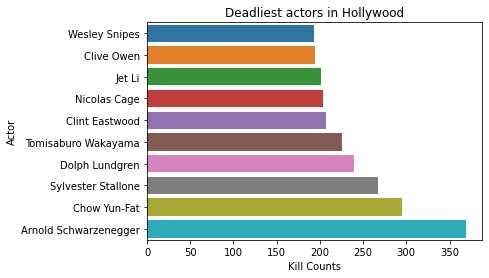

In [596]:
import pandas as pd
import seaborn as sns

kill = pd.read_csv('actor_kill_counts.csv')

res1 = sns.barplot(x='Count', y='Actor', data=kill, order=kill.sort_values('Count', ascending=True).Actor)
res1.set_xlabel('Kill Counts')
res1.set_ylabel('Actor')
res1.set_title("Deadliest actors in Hollywood", size=12)

# Question 9

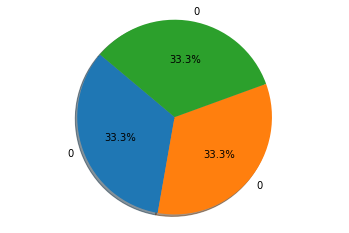

In [697]:
import pandas as pd
rome = pd.read_csv('roman-emperor-reigns.csv')
assasinated= rome[(rome['Cause_of_Death']=='Assasinated')].count()
    
labels = assasinated


others = rome.count() - labels
sizes = others

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Question 10

Text(0.5, 1.0, 'Total Revenue Earned by Computer Science PhDs in the U.S.')

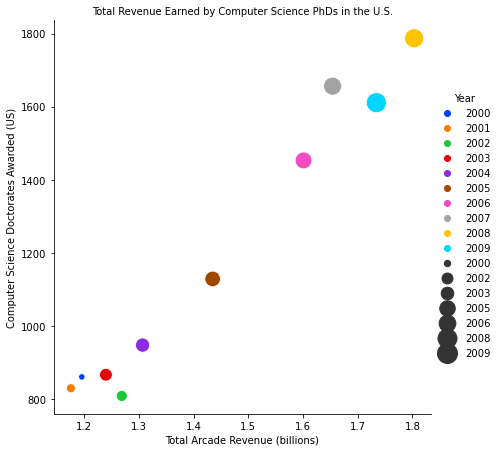

In [710]:
import pandas as pd

revenues = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue = revenues['Total Arcade Revenue (billions)'].values
doctorates = revenues['Computer Science Doctorates Awarded (US)'].values

seaborn= sns.relplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year", size="Year",
            sizes=(40, 400), alpha=1, palette="bright",
            height=6, data=revenues)
plt.title("Total Revenue Earned by Computer Science PhDs in the U.S.", fontsize=10)

## <center> Thank You